In [92]:
#import  data manipulation libraries
import numpy as np
import pandas as pd

#import filter warning librar
import warnings
warnings.filterwarnings("ignore")

#customize descriptive stats
from collections import OrderedDict

#converting data into numeric
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler

#import data visulization library
import matplotlib.pyplot as plt
import seaborn as sns
#split data
from sklearn.model_selection import train_test_split
#model traing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix



In [93]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\archive\german_credit_data.csv")
df.sample(15)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
266,266,36,male,2,own,NaN,NaN,6304,36,business
308,308,24,female,2,own,little,moderate,1237,8,furniture/equipment
906,906,24,male,1,own,NaN,little,3763,21,car
358,358,28,male,2,own,little,NaN,776,12,radio/TV
180,180,28,male,2,own,little,NaN,9572,36,business
548,548,24,female,1,own,little,little,626,12,radio/TV
498,498,32,male,1,own,little,moderate,1301,18,radio/TV
240,240,29,female,2,own,NaN,little,915,24,car
275,275,32,male,2,own,little,NaN,2697,9,radio/TV
80,80,44,female,2,own,NaN,NaN,5943,24,radio/TV


In [94]:
df = df.drop(columns=["Unnamed: 0"])

In [95]:
# Shape of dataset
print(df.shape)

(1000, 9)


In [96]:
#understand the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [97]:
#checking missing value
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [98]:
#filling missing value
cat_cols = ['Saving accounts', 'Checking account']
df[cat_cols] = df[cat_cols].fillna('Unkwn')


In [99]:
df.sample(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
636,28,female,2,own,quite rich,Unkwn,1376,24,radio/TV
721,24,female,2,rent,rich,moderate,433,6,education
932,30,male,2,own,little,Unkwn,1224,9,car
731,21,male,1,rent,little,little,1987,24,radio/TV
538,42,male,3,free,little,little,7763,48,car


In [100]:
le = LabelEncoder()
le_array = le.fit_transform(df["Sex"])
df["Sex"] = pd.DataFrame(le_array)

In [101]:
le = LabelEncoder()
le_array = le.fit_transform(df["Housing"])
df["Housing"] = pd.DataFrame(le_array)

In [102]:
le = LabelEncoder()
le_array = le.fit_transform(df["Saving accounts"])
df["Saving accounts"] = pd.DataFrame(le_array)

In [103]:
le = LabelEncoder()
le_array = le.fit_transform(df["Checking account"])
df["Checking account"] = pd.DataFrame(le_array)

In [104]:
le = LabelEncoder()
le_array = le.fit_transform(df["Purpose"])
df["Purpose"] = pd.DataFrame(le_array)

In [105]:
#drop a purpose column
df_numeric = df.drop(columns=['Purpose'])

In [106]:
#stastistic
numeric_cols = df.select_dtypes(include=['number']).columns  

stats = []
for i in numeric_cols:
    numerical_stats = OrderedDict({
        "Feature": i,
        "max": df[i].max(),
        "min": df[i].min(),
        "mean": df[i].mean(),
        "median": df[i].median(),
        "standard deviation": df[i].std(),
        "variance": df[i].var(),
        "skewness": df[i].skew(),
        "kurtosis": df[i].kurt(),
        "25%": df[i].quantile(0.25),
        "75%": df[i].quantile(0.75),
        "IQR": df[i].quantile(0.75) - df[i].quantile(0.25)
    })
    stats.append(numerical_stats)

# Create DataFrame report
report = pd.DataFrame(stats)
print(report.T)


                             0         1         2         3                4  \
Feature                    Age       Sex       Job   Housing  Saving accounts   
max                         75         1         3         2                4   
min                         19         0         0         0                0   
mean                    35.546      0.69     1.904     1.071             1.19   
median                    33.0       1.0       2.0       1.0              1.0   
standard deviation   11.375469  0.462725  0.653614  0.531264         0.966869   
variance            129.401285  0.214114  0.427211  0.282241         0.934835   
skewness              1.020739 -0.822868 -0.374295  0.070804         1.310342   
kurtosis               0.59578 -1.325543  0.501891  0.472976         1.693579   
25%                       27.0       0.0       2.0       1.0              1.0   
75%                       42.0       1.0       2.0       1.0              1.0   
IQR                       15

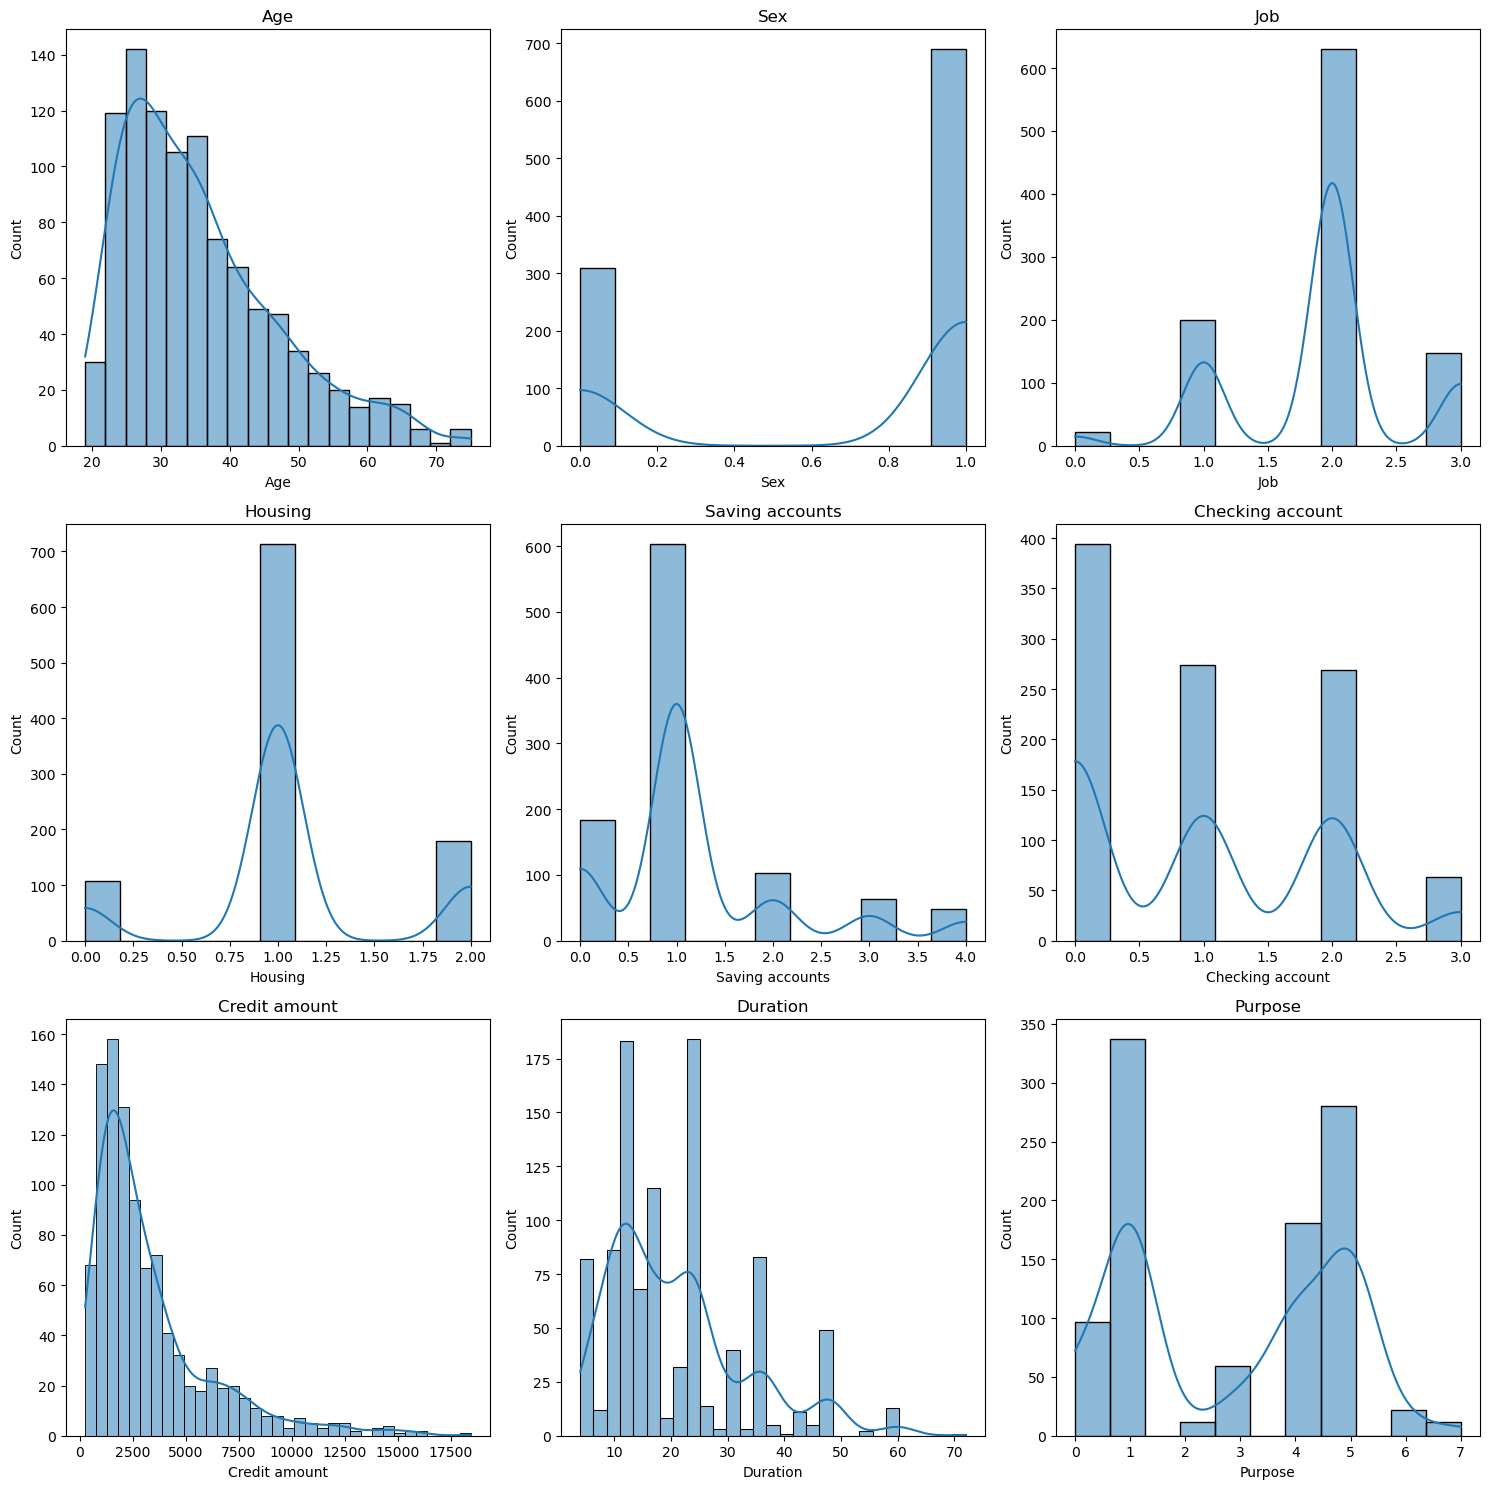

In [107]:
numeric_cols = df.select_dtypes(include=['number']).columns  

plt.figure(figsize=(15, 15))  # Bigger figure
plot = 0

for col in numeric_cols:
    plot += 1
    plt.subplot(3, 3, plot)  # adjust rows/cols if you have many columns
    sns.histplot(df[col], kde=True)  # kde=True adds density curve
    plt.title(col)

plt.tight_layout()
plt.show()

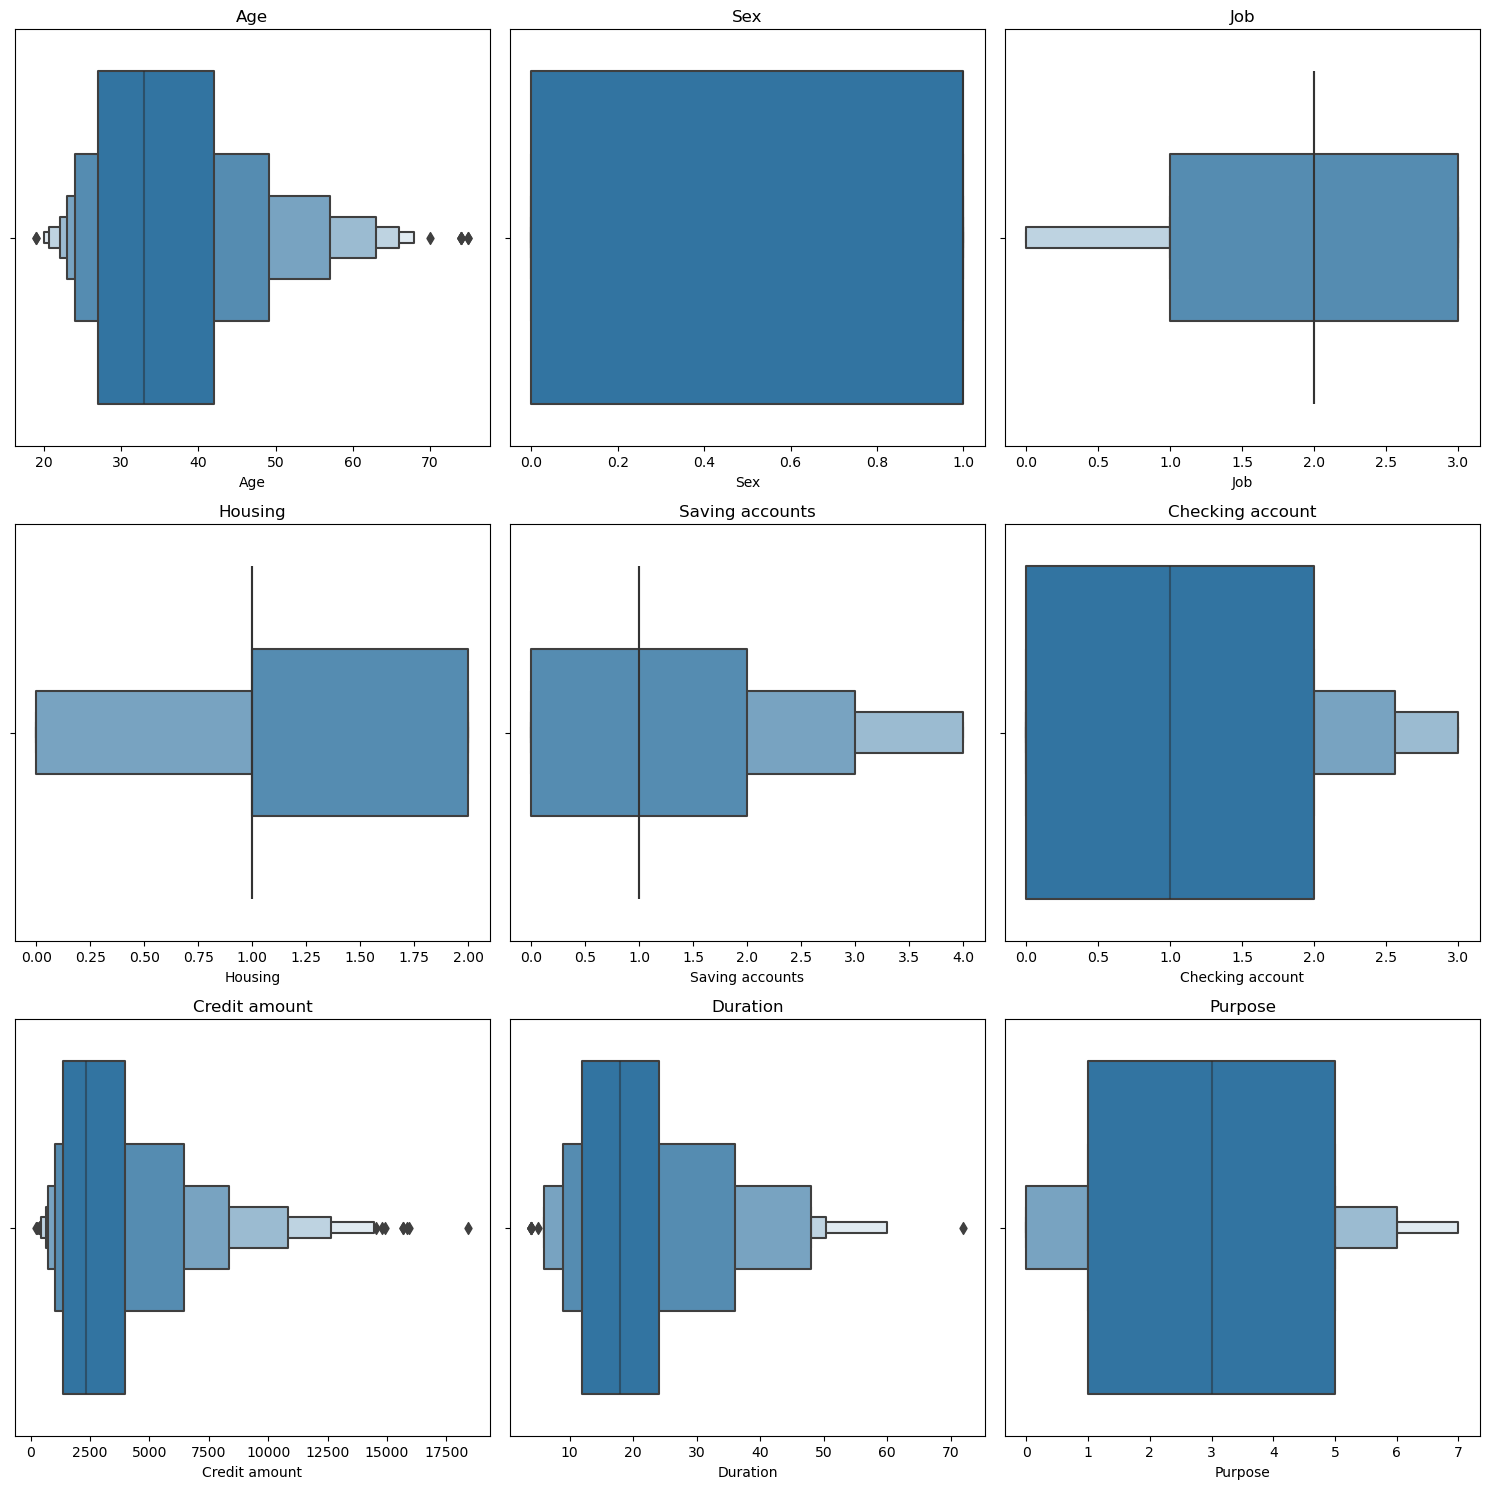

In [108]:
#checking outliers
numeric_cols = df.select_dtypes(include=['number']).columns  
plt.figure(figsize=(15, 15))
plot = 0
for col in numeric_cols:
    plot += 1
    plt.subplot(3, 3, plot)
    sns.boxenplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


In [109]:
def remove_outliers(df, column, threshold=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for numeric columns
for col in ["Age", "Credit amount", "Duration"]:
    df = remove_outliers(df, col)

In [121]:
# Define Features (X) and Target (y)
# Let's assume credit worthiness = "Good" if Credit amount < 4000 else "Bad"
# (since dataset does not have explicit target column for CIBIL or default)
df['Credit_Worthiness'] = np.where(df['Credit amount'] < 4000, 1, 0)

X = df.drop(columns=['Credit_Worthiness'])
y = df['Credit_Worthiness']

In [133]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [134]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [135]:
# Create and train model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [136]:
# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

In [137]:
dtree = DecisionTreeClassifier(max_depth=5, random_state=42)
dtree.fit(X_train, y_train)
y_pred_tree = dtree.predict(X_test)

# Evaluation
print("📌 Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

print("\n📌 Decision Tree Results")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

📌 Logistic Regression Results
Accuracy: 0.9768339768339769
[[ 31   6]
 [  0 222]]
              precision    recall  f1-score   support

           0       1.00      0.84      0.91        37
           1       0.97      1.00      0.99       222

    accuracy                           0.98       259
   macro avg       0.99      0.92      0.95       259
weighted avg       0.98      0.98      0.98       259


📌 Decision Tree Results
Accuracy: 0.9961389961389961
[[ 36   1]
 [  0 222]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       1.00      1.00      1.00       222

    accuracy                           1.00       259
   macro avg       1.00      0.99      0.99       259
weighted avg       1.00      1.00      1.00       259



In [139]:
y_pred = model.predict(X_test)

comparison = pd.DataFrame({
    "Applicant_ID": range(len(y_test)),
    "Actual": y_test,
    "Predicted": y_pred
})

comparison["Eligibility"] = comparison["Predicted"].map({
    1: "Eligible (Good Credit)",
    0: "Not Eligible (Bad Credit)"
})

print(comparison.head(10))


     Applicant_ID  Actual  Predicted                Eligibility
833             0       0          0  Not Eligible (Bad Credit)
700             1       1          1     Eligible (Good Credit)
144             2       1          1     Eligible (Good Credit)
245             3       1          1     Eligible (Good Credit)
445             4       1          1     Eligible (Good Credit)
948             5       1          1     Eligible (Good Credit)
665             6       0          0  Not Eligible (Bad Credit)
316             7       1          1     Eligible (Good Credit)
643             8       1          1     Eligible (Good Credit)
958             9       0          1     Eligible (Good Credit)
